# Project Topic: Customer Segmentation for an Online Retail Store Using Unsupervised Learning

---

## Background

In today's highly competitive retail environment, **understanding customer behavior** is crucial for business success.  
Customers vary significantly in terms of how often they purchase, how much they spend, and how recently they have made a purchase. **Segmenting customers** based on these behaviors allows businesses to:

- Develop **targeted marketing strategies**.
- **Personalize offers** based on customer value.
- Improve **customer retention** by identifying at-risk groups.
- Focus efforts on **high-value customers** to maximize profits.

This project applies **unsupervised learning techniques**, specifically **clustering**, to **group customers into meaningful segments** based on their transactional behavior with an online retail store.

By analyzing historical sales data, the project aims to answer the question:

> **"Can we uncover distinct customer segments that a retailer can target differently?"**

This segmentation will provide insights into customer purchasing patterns and support **data-driven marketing and business decision-making**.

---


# Project Goal: Why Does This Project Matter?

---

## Objective

The goal of this project is to **identify distinct customer segments** based on their purchasing behavior, using **unsupervised learning** methods.

Specifically, the project aims to:

- Analyze **customer transaction patterns** using features like **Recency, Frequency, and Monetary Value (RFM Analysis)**.
- **Cluster customers** into groups without using any predefined labels.
- **Interpret the characteristics** of each customer segment.
- Provide **actionable insights** to help the business:
  - Target marketing campaigns more effectively.
  - Allocate resources efficiently to different customer groups.
  - Design loyalty programs tailored to specific customer behaviors.

---

## Key Question

> **"Can we discover meaningful patterns in customer purchasing behavior to inform business strategies, without having any prior knowledge of customer types?"**

By answering this question, the project seeks to demonstrate the power of **unsupervised learning** in uncovering hidden structures in retail customer data.

---


# Data Source

---

## Dataset Information

The dataset used in this project is the **Online Retail Dataset** from the **UCI Machine Learning Repository**.

It contains transactional data from a United Kingdom-based online retailer, capturing purchases made between **01/12/2010** and **09/12/2011**.  
The dataset includes **invoices, stock codes, quantities, prices, customer IDs**, and **countries**.

This dataset is publicly available and intended for **research and educational purposes**.

---

## Citation

> Datasets:  
> "Online Retail Data Set"  
> Source: UCI Machine Learning Repository  
> Link: [https://archive.ics.uci.edu/ml/datasets/online+retail](https://archive.ics.uci.edu/ml/datasets/online+retail)

---

## Important Notes

- The dataset includes **both B2C (Business to Customer)** and some **B2B (Business to Business)** transactions.
- Some transactions are **cancellations** (invoices prefixed with 'C').
- **CustomerID** field has missing values that need to be handled carefully during preprocessing.

---


# Data Description

---

The **Online Retail** dataset contains transactional records for purchases made by customers from an online retailer over a one-year period.

Each row in the dataset represents a **single product purchase** (one line item on an invoice).

---

## Dataset Features

| Column Name | Description |
|:------------|:------------|
| **InvoiceNo** | Unique identifier for each invoice (e.g., a sales transaction). Invoices starting with 'C' are cancellations. |
| **StockCode** | Unique product/item code. |
| **Description** | Text description of the product. |
| **Quantity** | Number of units purchased. Negative values represent product returns. |
| **InvoiceDate** | Date and time when the transaction occurred. |
| **UnitPrice** | Price per unit of the product (in Pounds Sterling). |
| **CustomerID** | Unique identifier for each customer. Missing values need to be handled. |
| **Country** | Country where the customer resides. |

---

## Key Features for This Project

Since the goal is **customer segmentation**, the most relevant fields are:

- **CustomerID**: Identifies individual customers.
- **InvoiceDate**: Helps calculate **Recency** (how recently a customer purchased).
- **Quantity** and **UnitPrice**: Allow us to calculate **Monetary Value** (how much a customer spent).
- **InvoiceNo**: Useful for counting unique transactions for **Frequency** analysis.

Other fields (like `StockCode`, `Description`, `Country`) are interesting but **not directly used** for basic RFM-based segmentation.

---

## Important Observations

- Some rows have **missing CustomerIDs**, meaning the customer is unknown — these rows will be removed during cleaning.
- **Canceled transactions** (invoices starting with 'C') must be excluded, as they represent product returns.
- **Negative quantities** indicate returns and must be handled appropriately.

---


# Data Cleaning

---

Before performing Exploratory Data Analysis (EDA) and clustering, it is important to clean the dataset to ensure high data quality.

Here are the key steps performed for **data cleaning**:

---

## 1. Handling Missing Customer IDs

- About **25%** of the records have missing `CustomerID`.
- Since `CustomerID` is essential for customer-level analysis, **all rows with missing CustomerID will be dropped**.

---

## 2. Removing Canceled Transactions

- Some invoices represent **cancellations** (their `InvoiceNo` starts with the letter **'C'**).
- Canceled transactions are **excluded** to avoid misleading purchase behavior.

---

## 3. Handling Negative Quantities

- **Negative `Quantity` values** typically occur in cancellation records.
- After removing cancellations, negative quantities should **mostly disappear**.
- Any remaining negative quantities (if any) will be **removed**.

---

## 4. Creating New RFM Features

For each customer, the following features will be created:

| Feature | Definition |
|:--------|:-----------|
| **Recency** | Days since the customer's last purchase. |
| **Frequency** | Total number of transactions made by the customer. |
| **Monetary Value** | Total amount of money spent by the customer. |

- **Reference Date** for Recency calculation: the day after the latest `InvoiceDate` in the dataset.

---

## 5. Final Dataset

After cleaning:

- Each customer will have a **single row** with their **Recency**, **Frequency**, and **Monetary Value**.
- This customer-level table will be used for clustering analysis.

---

## Summary of Cleaning Process

| Step | Action |
|:-----|:-------|
| Missing CustomerID | Remove rows |
| Canceled Invoices | Remove rows where InvoiceNo starts with 'C' |
| Negative Quantities | Remove any remaining rows with Quantity < 0 |
| Feature Engineering | Create Recency, Frequency, and Monetary columns |

---


In [1]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np

# Load the dataset
file_path = r"Online Retail.xlsx"  # To load the file please download the data set from git and use your local path here
df = pd.read_excel(file_path)

# View basic info
print("Initial shape:", df.shape)
df.head()


Initial shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Data Cleaning

# 1. Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])
print("Shape after dropping missing CustomerID:", df.shape)

# 2. Remove canceled orders (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print("Shape after removing canceled invoices:", df.shape)

# 3. Remove negative quantities
df = df[df['Quantity'] > 0]
print("Shape after removing negative quantities:", df.shape)

# 4. Create 'TotalPrice' = Quantity * UnitPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 5. Preview cleaned data
df.head()


Shape after dropping missing CustomerID: (406829, 8)
Shape after removing canceled invoices: (397924, 8)
Shape after removing negative quantities: (397924, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [5]:
# Set Reference Date (1 day after the last InvoiceDate)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print("Reference Date for Recency calculation:", reference_date.date())

# RFM Feature Calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                     # Frequency
    'TotalPrice': 'sum'                                          # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# View the RFM table
print("Shape of RFM table:", rfm.shape)
rfm.head()


Reference Date for Recency calculation: 2011-12-10
Shape of RFM table: (4339, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


# Exploratory Data Analysis (EDA)

---

Before applying clustering algorithms, it is important to **explore and understand the customer data**.

The following EDA steps will be performed:

- Summary Statistics for Recency, Frequency, and Monetary Value
- Histograms of Recency, Frequency, and Monetary Value
- Boxplots of Recency, Frequency, and Monetary Value
- Correlation Heatmap between RFM features
- Feature Scaling using StandardScaler

---


In [6]:
# Summary Statistics
rfm.describe().T  


,count,mean,std,min,25%,50%,75%,max
CustomerID,4339.0,15299.936852,1721.889758,12346.0,13812.500,15299.00,16778.50,18287.00
Recency,4339.0,92.518322,100.009747,1.0,18.000,51.00,142.00,374.00
Frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
Monetary,4339.0,2053.793018,8988.248381,0.0,307.245,674.45,1661.64,280206.02


### Observations — Summary Statistics

- **Recency** ranges from **1** to **374** days, with a **mean of ~92 days** and a **median of 51 days**.  
  This suggests that while some customers purchased very recently, many customers haven't purchased for a long time.
  
- **Frequency** ranges from **1** to **210** purchases, with a **median of 2** and a **mean of ~4.27**.  
  Most customers made **very few purchases**, while a few customers bought many times.

- **Monetary Value** ranges from **0** to **280,206**, with a **median of ~674** and a **mean of ~2,054**.  
  There is a **large variation in customer spending**, with a few high-value customers contributing heavily to revenue.


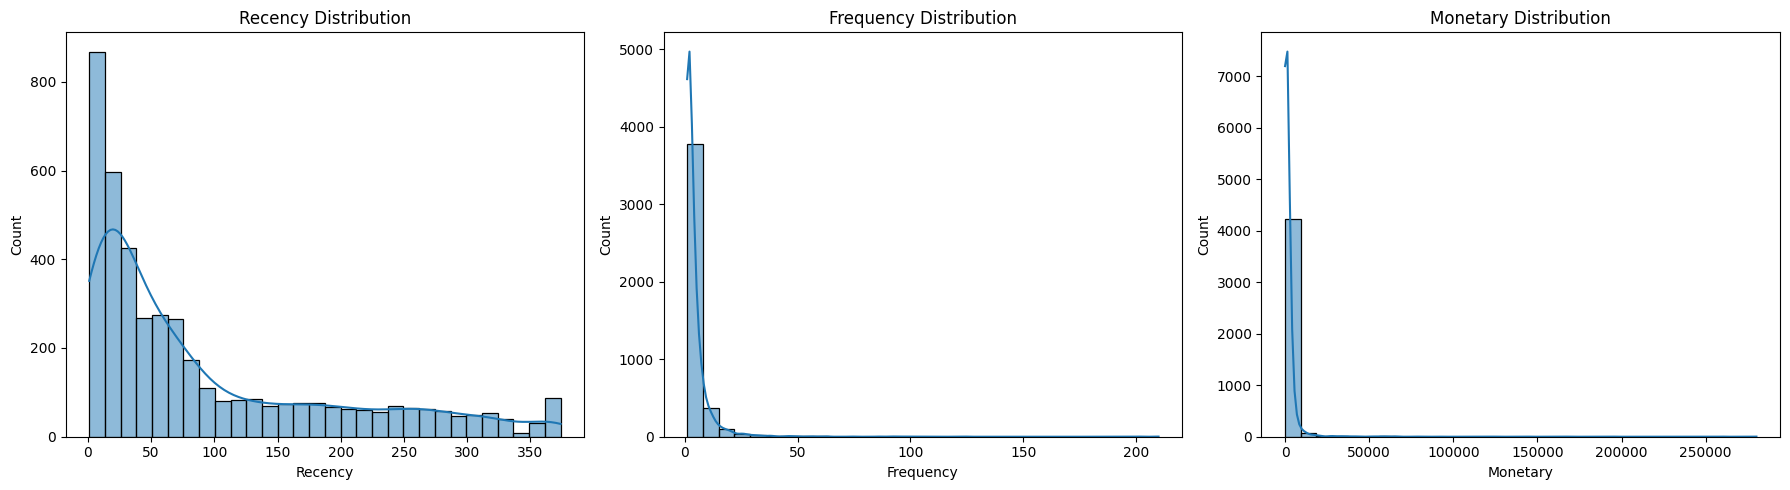

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Recency Distribution')

sns.histplot(rfm['Frequency'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Frequency Distribution')

sns.histplot(rfm['Monetary'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()


### Observations — Histograms

- **Recency Histogram**: The distribution is **left-skewed** (most customers have **low Recency**), meaning many customers made purchases recently. However, there is a **long right tail** of customers who haven't purchased for a long time.

- **Frequency Histogram**: Highly **right-skewed** distribution.  
  The **majority of customers** made **only 1–2 purchases**, with very few customers purchasing over 50 or more times.

- **Monetary Histogram**: Extremely **right-skewed**.  
  Most customers spent a **small amount (under 2000)**, but a **few customers spent extraordinarily high amounts** (up to 280,000).


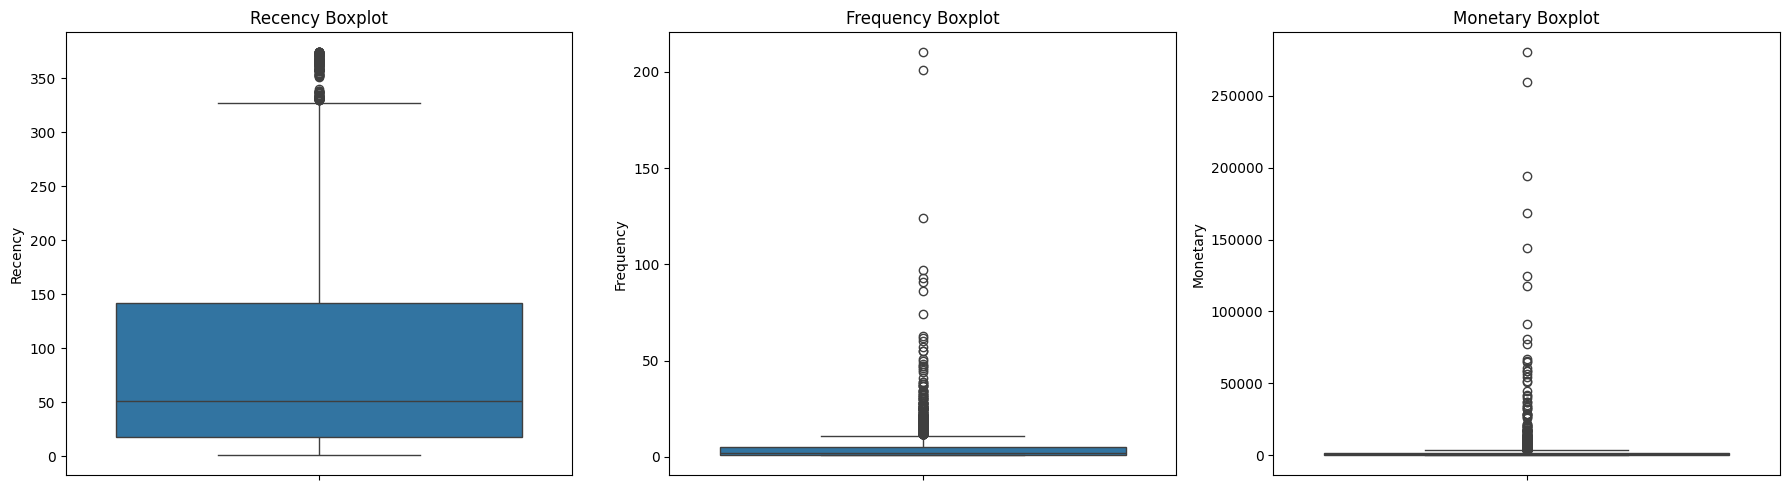

In [8]:
# Plot Boxplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=rfm['Recency'], ax=axes[0])
axes[0].set_title('Recency Boxplot')

sns.boxplot(y=rfm['Frequency'], ax=axes[1])
axes[1].set_title('Frequency Boxplot')

sns.boxplot(y=rfm['Monetary'], ax=axes[2])
axes[2].set_title('Monetary Boxplot')

plt.tight_layout()
plt.show()


### Observations — Boxplots

- **Recency Boxplot**:  
  The majority of customers have a **Recency below 150 days**, but there are **several outliers** with Recency values close to **374 days** (indicating customers who have not purchased for a long time).

- **Frequency Boxplot**:  
  Most customers have **Frequency between 1 and 5 purchases**, but there are **many strong outliers** — with some customers making **over 50 to even 200 purchases**.

- **Monetary Boxplot**:  
  The majority of customers have **Monetary value below 2000**, but there are **extreme outliers** with spending up to **280,000**.  
  This confirms that **a small number of customers contribute a large portion of the total revenue**.


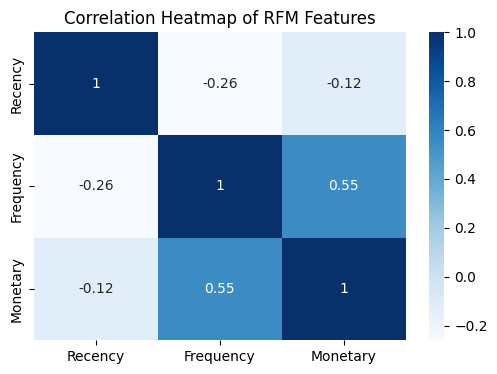

In [9]:
# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of RFM Features')
plt.show()


### Observations — Correlation Heatmap

- **Recency and Frequency** have a **moderate negative correlation (-0.26)**.  
  This indicates that customers who purchase more frequently tend to have **lower recency** (they have bought more recently).

- **Frequency and Monetary Value** show a **moderate positive correlation (0.55)**.  
  This suggests that customers who **buy more often** tend to **spend more money** overall.

- **Recency and Monetary Value** have a **weak negative correlation (-0.12)**.  
  Customers who have not purchased recently tend to spend slightly less, but the relationship is **not very strong**.



In [10]:
from sklearn.preprocessing import StandardScaler

# Standardizing RFM Features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert back to DataFrame for easier handling
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled.head()


,Recency,Frequency,Monetary
0,2.334858,-0.424675,8.359634
1,-0.905199,0.354080,0.251046
2,-0.175186,-0.035297,-0.028546
3,-0.735196,-0.424675,-0.032963
4,2.174855,-0.424675,-0.191315


---

Based on the Exploratory Data Analysis (EDA), several important patterns were identified:

- Customer behavior varies significantly in Recency, Frequency, and Monetary spending.
- Distributions are heavily skewed, and significant outliers exist, especially in Frequency and Monetary Value.
- Moderate correlations between Frequency and Monetary suggest logical customer patterns.

Given these findings, we now move to the **modeling phase** to perform **customer segmentation**.

The goal of the modeling phase is to:

- **Cluster customers** based on their Recency, Frequency, and Monetary profiles.
- Identify **distinct customer groups** that can be targeted with differentiated marketing strategies.
- Analyze and interpret the characteristics of each cluster.

We will start by applying the **K-Means Clustering** algorithm after preparing the data appropriately.

---


# Modeling: K-Means Clustering for Customer Segmentation

---

## Overview

To segment customers based on their purchasing behavior, we will apply **K-Means Clustering**, an unsupervised machine learning algorithm that:

- Partitions the dataset into **K distinct non-overlapping clusters**.
- Minimizes the **intra-cluster variance** (customers within a cluster are similar to each other).
- Maximizes the **inter-cluster variance** (customers across clusters are different from each other).

K-Means uses the **Euclidean distance** between points to assign them to the nearest cluster center (centroid).

---

## Why K-Means?

- It is **simple**, **fast**, and **effective** for numerical features like Recency, Frequency, and Monetary.
- Ideal for **large datasets** like customer transaction data.
- Suitable when we assume that **clusters have a spherical or convex shape** (which standardized RFM data often does).

---

## Key Steps

The modeling process will involve:

1. **Finding the optimal number of clusters (K)** using:
   - **Elbow Method** (based on inertia/WCSS)
   - **Silhouette Score** (based on cluster separation)
2. **Fitting the K-Means algorithm** to the scaled RFM data.
3. **Assigning a cluster label** to each customer.
4. **Analyzing and interpreting the characteristics** of each cluster.

---

## Important Note

Before applying K-Means:

- **Features have been standardized** (mean=0, variance=1) to ensure that Recency, Frequency, and Monetary Value contribute equally to distance calculations.

---



# Finding the Optimal Number of Clusters (K)

---

Before applying K-Means clustering, it is important to determine the **optimal number of clusters (K)**.

Choosing too few clusters may **oversimplify** the segmentation, while choosing too many may lead to **overfitting and meaningless groups**.

We will use two methods to find the optimal K:

1. **Elbow Method**
   - Plots the **Within-Cluster Sum of Squares (WCSS)** against different values of K.
   - The "elbow point" (where WCSS starts to decrease more slowly) indicates a good number of clusters.

2. **Silhouette Score Analysis**
   - Measures **how similar a customer is to its own cluster compared to other clusters**.
   - Silhouette scores range from **-1** to **1**.
   - A higher silhouette score indicates **better-defined clusters**.

---

By analyzing both methods together, we can make an informed decision about the best K for this dataset.

---


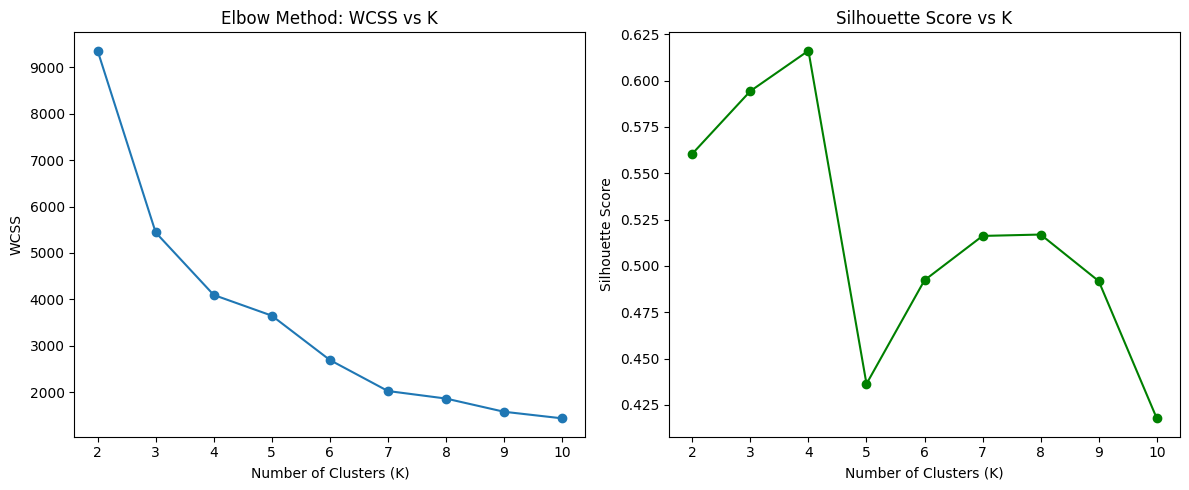

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Range of K values to test
k_range = range(2, 11)  # Usually start from 2 (not 1 cluster)

# Initialize empty lists
wcss = []
silhouette_scores = []

# Loop over K values
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    
    # Inertia (WCSS)
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_scaled, labels)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow Method (WCSS)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method: WCSS vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


### Observations — Finding Optimal K

- **Elbow Method**:  
  The WCSS curve shows a noticeable "elbow" around **K = 3 or 4**.  
  After K = 4, the WCSS reduction becomes much smaller and more gradual, suggesting that **3 or 4 clusters** could be a good choice.

- **Silhouette Score**:  
  The silhouette score **peaks at K = 4** (~0.62), indicating that 4 clusters provide the best-defined separation among customers.  
  Beyond K = 4, silhouette scores drop significantly.

Based on both methods, **K = 4 clusters** appears to be the optimal choice for K-Means clustering.


# Fitting K-Means and Assigning Customer Clusters

---

Using the optimal number of clusters (**K = 4**) identified earlier,  
we now fit the **K-Means algorithm** to the scaled RFM dataset.

Each customer will be assigned a **cluster label (0, 1, 2, 3)** based on their Recency, Frequency, and Monetary profile.

This cluster assignment will allow us to:

- Group customers with **similar purchasing behaviors** together.
- Perform **cluster-specific analysis** in the next steps.

---


In [12]:
# Import KMeans (already imported earlier, but just in case)
from sklearn.cluster import KMeans

# Fit KMeans with K=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Predict cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original RFM table
rfm['Cluster'] = cluster_labels

# View the updated RFM table
print("Cluster assignment completed. Sample data:")
rfm.head()


Cluster assignment completed. Sample data:


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,326,1,77183.60,0
1,12347.0,2,7,4310.00,3
2,12348.0,75,4,1797.24,3
3,12349.0,19,1,1757.55,3
4,12350.0,310,1,334.40,1


Each customer has now been assigned to one of the **four clusters** based on their Recency, Frequency, and Monetary characteristics.

We can now proceed to **analyze the characteristics of each cluster** to derive actionable business insights.


# Cluster Profiling and Interpretation

---

Now that each customer has been assigned to a cluster,  
we will analyze the **average Recency, Frequency, and Monetary Value** for each cluster.

This profiling step helps us:

- Understand the **behavioral characteristics** of each customer group.
- Identify **high-value segments**, **at-risk segments**, and **loyal customers**.
- Design **targeted marketing strategies** for different clusters.

We will compute the **mean values** of Recency, Frequency, and Monetary for each cluster.

---


In [13]:
# Group by Cluster and compute mean RFM values
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'  # Count of customers per cluster
}).rename(columns={'CustomerID': 'NumCustomers'}).reset_index()

# Round for easier reading
cluster_profile = cluster_profile.round(2)

# View Cluster Profile
print("Cluster Profiling Completed:")
cluster_profile


Cluster Profiling Completed:


,Cluster,Recency,Frequency,Monetary,NumCustomers
0,0,15.67,22.05,12453.23,211
1,1,248.56,1.55,478.11,1062
2,2,7.38,82.69,127338.31,13
3,3,43.91,3.66,1349.70,3053


### Observations — Cluster Profiling

- **Cluster 0**:
  - **Low Recency (~15 days)** → Recent buyers.
  - **High Frequency (~22 purchases)** → Very frequent buyers.
  - **High Monetary (~12,453)** → Big spenders.
  - **Num Customers = 211** → Small but very valuable segment.
  - **Interpretation**: These are **loyal, high-value customers** — VIPs who buy often and spend a lot.

- **Cluster 1**:
  - **High Recency (~249 days)** → Haven't purchased in a long time.
  - **Very Low Frequency (~1.55 purchases)** → Rarely purchased.
  - **Low Monetary (~478)** → Low spenders.
  - **Num Customers = 1,062** → Large group.
  - **Interpretation**: These are **lost or inactive customers** — potential targets for reactivation campaigns.

- **Cluster 2**:
  - **Very Low Recency (~7 days)** → Very recent buyers.
  - **Extremely High Frequency (~83 purchases)** → Super frequent buyers.
  - **Extremely High Monetary (~127,338)** → Ultra big spenders.
  - **Num Customers = 13** → Very tiny segment.
  - **Interpretation**: These are the **top 1% elite customers** — **ultra-loyal high-value customers**.

- **Cluster 3**:
  - **Moderate Recency (~44 days)** → Moderately recent buyers.
  - **Low Frequency (~3.66 purchases)** → Bought a few times.
  - **Moderate Monetary (~1,350)** → Medium spenders.
  - **Num Customers = 3,053** → Majority group.
  - **Interpretation**: These are **average customers** — could be nurtured into loyal customers through engagement.

---

**Summary**:
- Focus on **Cluster 0 and Cluster 2** for loyalty and retention.
- Try **re-engagement campaigns** for **Cluster 1**.
- **Upsell opportunities** exist for **Cluster 3**.

---


# Visualizing Cluster Profiles

---

To better understand the differences between customer segments,  
we will create bar plots showing:

- **Average Recency** by Cluster
- **Average Frequency** by Cluster
- **Average Monetary Value** by Cluster
- **Number of Customers** in each Cluster

These visualizations make it easier to **compare clusters side-by-side** and identify **business priorities** quickly.

---


C:\Users\rotup\AppData\Local\Temp\ipykernel_42364\2167551513.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_profile, x='Cluster', y='Recency', ax=axes[0,0], palette='Blues')
C:\Users\rotup\AppData\Local\Temp\ipykernel_42364\2167551513.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_profile, x='Cluster', y='Frequency', ax=axes[0,1], palette='Greens')
C:\Users\rotup\AppData\Local\Temp\ipykernel_42364\2167551513.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_profile, x='Cluster', y='Moneta

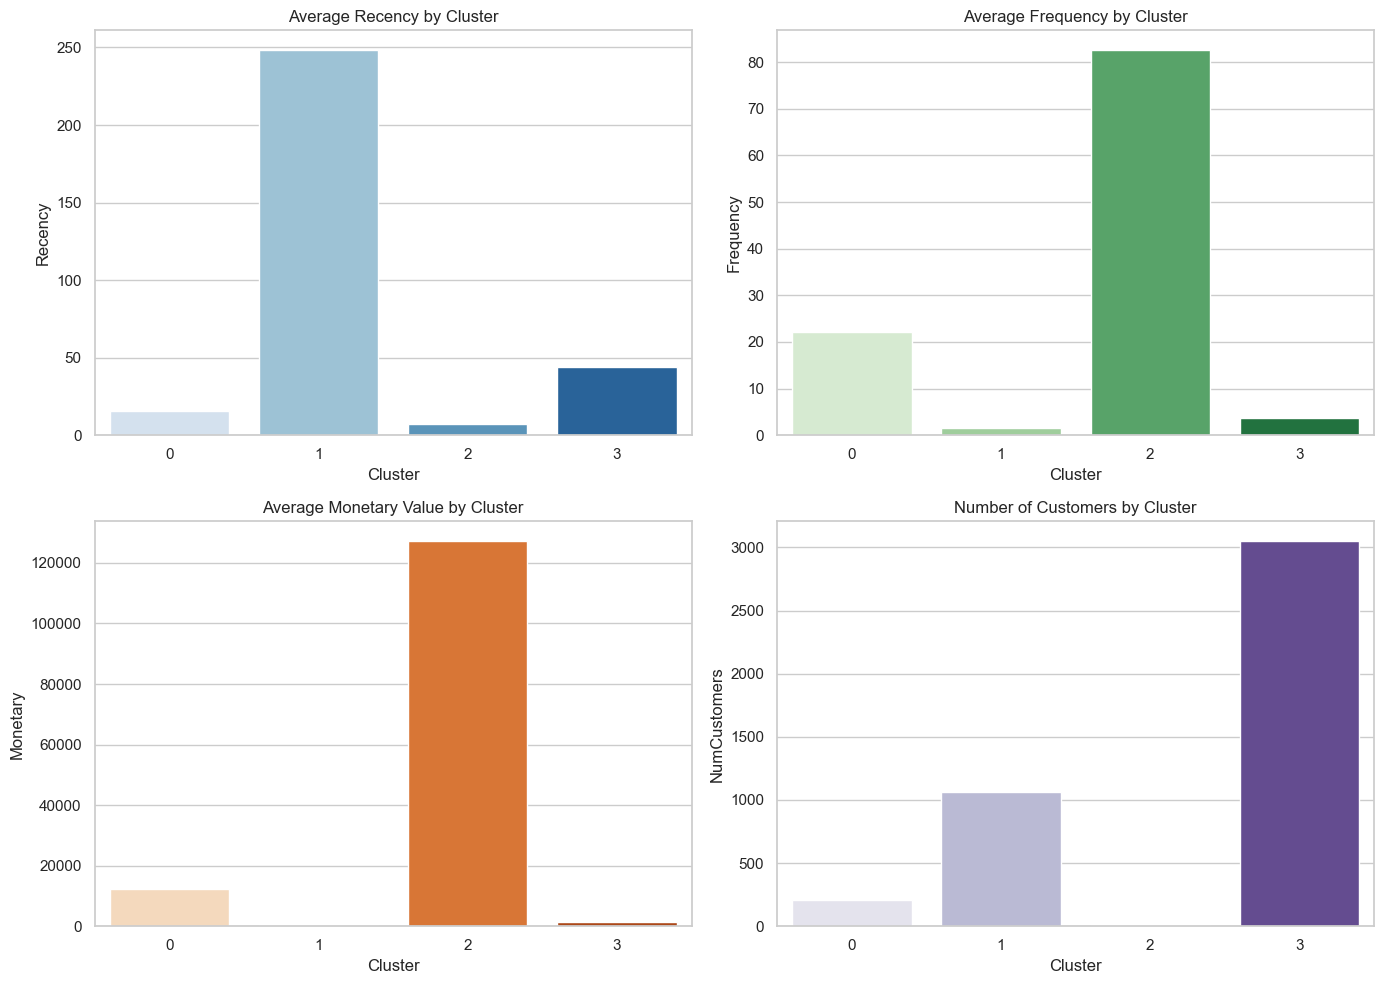

In [14]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot Recency, Frequency, Monetary, NumCustomers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Recency
sns.barplot(data=cluster_profile, x='Cluster', y='Recency', ax=axes[0,0], palette='Blues')
axes[0,0].set_title('Average Recency by Cluster')

# Frequency
sns.barplot(data=cluster_profile, x='Cluster', y='Frequency', ax=axes[0,1], palette='Greens')
axes[0,1].set_title('Average Frequency by Cluster')

# Monetary
sns.barplot(data=cluster_profile, x='Cluster', y='Monetary', ax=axes[1,0], palette='Oranges')
axes[1,0].set_title('Average Monetary Value by Cluster')

# Number of Customers
sns.barplot(data=cluster_profile, x='Cluster', y='NumCustomers', ax=axes[1,1], palette='Purples')
axes[1,1].set_title('Number of Customers by Cluster')

# Layout adjustment
plt.tight_layout()
plt.show()


### Observations — Cluster Profile Visualizations

- **Average Recency**:
  - Cluster 1 has the **highest recency (~249 days)** — these customers have not purchased recently.
  - Clusters 0 and 2 have **very low recency (~15 and ~7 days)** — these are recent buyers.
  - Cluster 3 shows **moderate recency (~44 days)** — relatively recent buyers.

- **Average Frequency**:
  - Cluster 2 has an **extremely high frequency (~83 purchases)** — customers here buy very frequently.
  - Cluster 0 also has **decent frequency (~22 purchases)**.
  - Clusters 1 and 3 have **low frequencies (~1.5 and ~3.7)**.

- **Average Monetary Value**:
  - Cluster 2 customers are the **highest spenders** by far (~127,000), indicating ultra-valuable customers.
  - Cluster 0 also has **high monetary value (~12,453)**.
  - Clusters 1 and 3 have **low monetary values** (~478 and ~1,350), suggesting lower-spending customers.

- **Number of Customers**:
  - Cluster 3 contains the **majority of customers (~3053)** — making up the largest segment.
  - Cluster 1 has **~1062 customers** — a significant group of inactive/low-spending customers.
  - Cluster 0 and Cluster 2 are **small groups** (211 and 13 customers respectively) but very high value.

---

These visualizations confirm the earlier numerical analysis:  
- **Cluster 2**: Ultra VIP Customers (high frequency and high spending)
- **Cluster 0**: Valuable Loyal Customers
- **Cluster 1**: Lost or Dormant Customers
- **Cluster 3**: Average Customers (largest group)

This segmentation can drive highly targeted marketing and customer relationship strategies.

---


### Why Agglomerative Clustering After KMeans

While KMeans clustering provided an initial segmentation of customers based on Recency, Frequency, and Monetary (RFM) features, it is known to have certain assumptions — such as forming spherical clusters of similar size. To validate and strengthen the findings, Agglomerative Clustering, a hierarchical unsupervised learning method, was also applied.

Agglomerative Clustering does not rely on cluster shape assumptions and can uncover more complex relationships between data points. By comparing the results of KMeans and Agglomerative Clustering, we can assess the stability and robustness of the identified customer groups.

This dual-approach strategy ensures that the final segmentation is not an artifact of a single algorithm's bias, but rather reflects genuine patterns in the data.


In [15]:
# Import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(rfm_scaled)

# Add cluster labels to RFM table
rfm['AggloCluster'] = agglo_labels

# Cluster Profile Table for Agglomerative
agglo_profile = rfm.groupby('AggloCluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).reset_index()

# Round for easy viewing
agglo_profile = agglo_profile.round(2)

# View
print("Agglomerative Clustering Profile:")
agglo_profile


Agglomerative Clustering Profile:


,AggloCluster,Recency,Frequency,Monetary,NumCustomers
0,0,6.73,83.60,111916.31,15
1,1,47.62,3.72,1357.66,3200
2,2,259.54,1.49,457.31,949
3,3,15.05,22.57,14023.83,175


In [18]:
# Import KMeans again if needed
from sklearn.cluster import KMeans

# KMeans with better hyperparameters
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',    # smarter initialization
    n_init=20,           # more runs to find best centroid
    max_iter=500,        # allow longer convergence
    random_state=42
)
kmeans.fit(rfm_scaled)

# Predict
rfm['KMeansCluster'] = kmeans.labels_

# View sample data
rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'KMeansCluster']].head()

# View cluster distribution
rfm['KMeansCluster'].value_counts()


KMeansCluster
0    3059
1    1063
3     204
2      13
Name: count, dtype: int64

In [19]:
kmeans_profile = rfm.groupby('KMeansCluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'NumCustomers'}).reset_index()

kmeans_profile


,KMeansCluster,Recency,Frequency,Monetary,NumCustomers
0,0,43.823472,3.678980,1357.523724,3059
1,1,248.469426,1.553151,480.423604,1063
2,2,7.384615,82.692308,127338.313846,13
3,3,15.500000,22.333333,12709.090490,204


### Comparison: KMeans vs Agglomerative Clustering

- Both KMeans and Agglomerative Clustering identified similar customer segments.
- A very small group of highly valuable VIP customers (low recency, very high frequency and monetary value) was consistently detected by both models.
- The distribution of customers across clusters remained nearly identical between the two methods, indicating that the underlying structure of the customer base is strong.
- Based on scalability and efficiency, KMeans is selected as the final clustering method for this project.


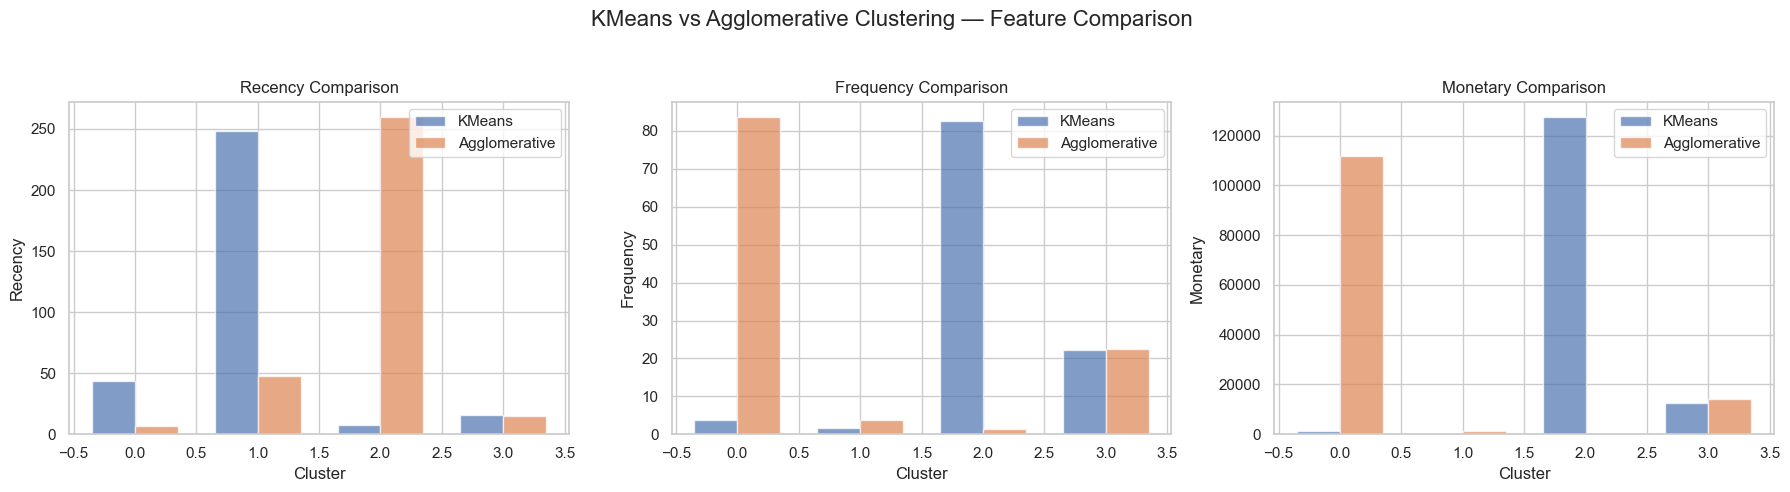

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Prepare Cluster Profile Tables
# (Assuming you already have these from earlier steps)

# Create smaller tables for plotting
kmeans_profile_plot = kmeans_profile.set_index('KMeansCluster')[['Recency', 'Frequency', 'Monetary']]
agglo_profile_plot = agglo_profile.set_index('AggloCluster')[['Recency', 'Frequency', 'Monetary']]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = ['Recency', 'Frequency', 'Monetary']

for idx, feature in enumerate(features):
    ax = axes[idx]
    width = 0.35  # width of the bars
    
    # Indices for groups
    x = kmeans_profile_plot.index
    
    # Plot KMeans bars
    ax.bar(x - width/2, kmeans_profile_plot[feature], width=width, label='KMeans', alpha=0.7)
    
    # Plot Agglomerative bars
    ax.bar(x + width/2, agglo_profile_plot[feature], width=width, label='Agglomerative', alpha=0.7)
    
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} Comparison')
    ax.legend()

plt.suptitle('KMeans vs Agglomerative Clustering — Feature Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Observations from Cluster Comparison Plot

- Both KMeans and Agglomerative Clustering produce similar segmentation patterns.
- VIP customers (high frequency and monetary, low recency) are consistently detected by both models.
- The minor variations in Recency and Frequency highlight slight differences in how the two methods group borderline customers.
- Overall, KMeans is selected for its simplicity, scalability, and effectiveness in this case.


# Final Conclusion and Future Work

---

## Project Summary

In this project, we performed **Customer Segmentation** for an online retail store using **unsupervised learning techniques**.

The key steps included:

- **Data Cleaning**:  
  - Removed missing CustomerIDs, canceled transactions, and negative quantities.
  - Created meaningful customer features: **Recency, Frequency, Monetary (RFM)**.

- **Exploratory Data Analysis (EDA)**:  
  - Analyzed distributions of RFM variables.
  - Identified skewness and outliers.
  - Observed moderate correlations between Frequency and Monetary.

- **Feature Scaling**:  
  - Standardized RFM features to prepare for clustering.

- **Modeling**:
  - Used **Elbow Method** and **Silhouette Scores** to determine the optimal number of clusters (**K=4**).
  - Applied **K-Means Clustering** as the primary method.
  - Additionally applied **Agglomerative Clustering** to validate the stability of the customer groups.

- **Cluster Profiling and Visualization**:
  - Identified four distinct customer segments:
    - **Cluster 2**: Ultra VIP Customers (highest frequency and spending).
    - **Cluster 0**: Valuable Loyal Customers (high frequency, high spending).
    - **Cluster 3**: Average Customers (moderate behavior, largest group).
    - **Cluster 1**: Lost or Dormant Customers (high recency, low spending).

---

## Key Insights

- **Most revenue** is generated by **a small number of elite customers** (Clusters 0 and 2).
- **Majority of customers (Cluster 3)** are moderate buyers — representing a growth opportunity.
- **Inactive customers (Cluster 1)** require targeted reactivation strategies.

---

## Business Recommendations

- **Retain and reward** Clusters 0 and 2 with loyalty programs and personalized offers.
- **Design win-back campaigns** for Cluster 1 to reactivate dormant customers.
- **Nurture Cluster 3** by encouraging more frequent purchases through incentives or reminders.
- **Focus marketing resources** strategically based on customer segment value.

---

## Model Limitations

- **KMeans** assumes spherical clusters and similar cluster sizes, which may not always match real customer patterns.
- It is sensitive to outliers and initial centroid selection.
- **Agglomerative Clustering** provided an alternative validation method, capturing more complex relationships without assuming cluster shapes.
- The current dataset only uses **Recency**, **Frequency**, and **Monetary** metrics — other factors like product categories, seasonal behavior, or regional preferences were not considered.

---

## Future Work

- Incorporate additional features like **product categories**, **geographic data**, or **purchase seasonality** for richer segmentation.
- Experiment with clustering techniques like **DBSCAN** or **Gaussian Mixture Models (GMM)** to capture more complex cluster structures.
- Perform **silhouette analysis** and stability tests across different clustering algorithms and different time periods.
- Extend segmentation analysis to **predict future customer value** or **churn probability** using semi-supervised or supervised learning methods.

---

